In [1]:
import librosa as lib
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write
import IPython.display as ipd

In [2]:
sig, sr = lib.load("Grego_chant.wav")
sr = 22050
t = 5*sr

In [3]:
li = []
for i in range(0,len(sig)-t,t):
    li.append(sig[i:i+t])

In [4]:
snd_1 = li[450]

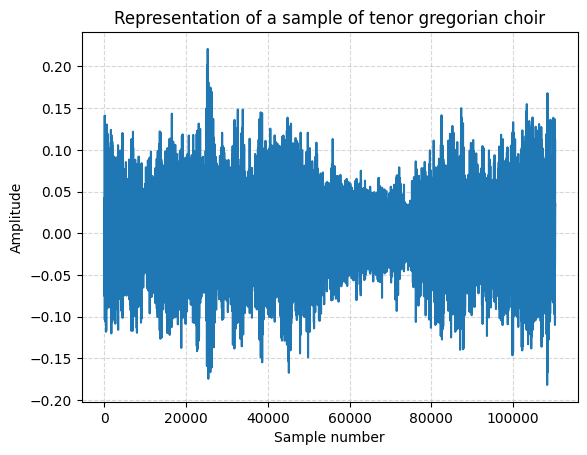

In [5]:
plt.figure()
plt.plot(snd_1)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.grid(alpha=.5, ls='--')
plt.title("Representation of a sample of tenor gregorian choir")
plt.show()

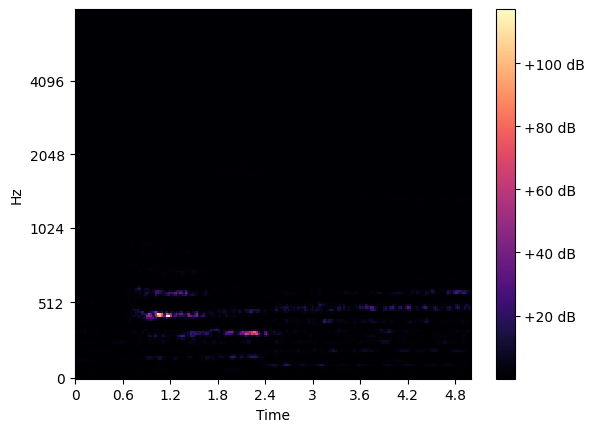

In [20]:
hl = 512 # number of samples per time-step in spectrogram
hi = 216 # Height of image
wi = 384 # Width of image

fig, ax = plt.subplots()

S = lib.feature.melspectrogram(y=snd_1, sr=sr, n_mels=hi, fmax=8000,hop_length=hl)
S_dB = lib.power_to_db(S, ref=np.max)
img = lib.display.specshow(S, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)

ax.set(title="")
fig.colorbar(img,ax=[ax],format='%+2.0f dB')
plt.show()

In [21]:
np.shape(S)

(216, 216)

In [8]:
hl = 512 # number of samples per time-step in spectrogram
hi = 216 # Height of image
wi = 384 # Width of image

spec = []
for el in li:
    S = lib.feature.melspectrogram(y=el, sr=sr, n_mels=hi, fmax=8000,hop_length=hl)
    S_dB = lib.power_to_db(S, ref=np.max)
    spec.append(S_dB)

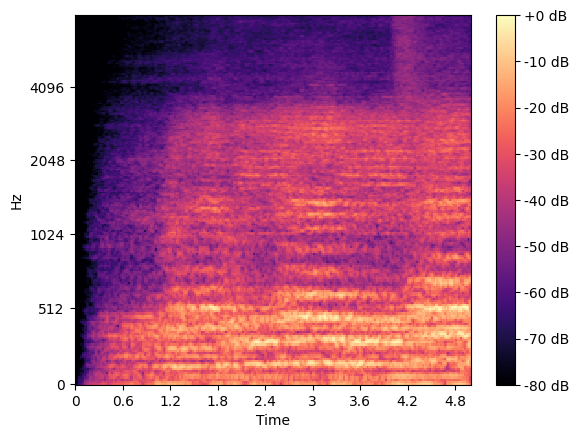

In [14]:
I = spec[0]
fig,ax = plt.subplots()
img = lib.display.specshow(I, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax)
ax.set(title="")
fig.colorbar(img,ax=[ax],format='%+2.0f dB')
plt.show()

In [22]:
I_wav = lib.feature.inverse.mel_to_audio(S,sr=22050, hop_length=hl,fmax=8000)

ipd.Audio(I_wav, rate=22050)

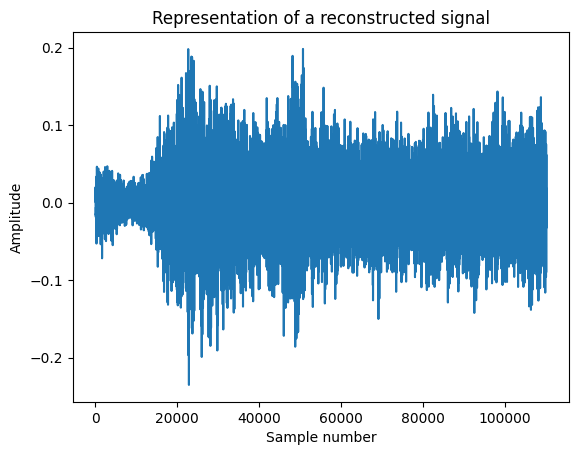

In [23]:
plt.figure()
plt.plot(I_wav)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.title("Representation of a reconstructed signal")
plt.show()